In [1]:
# Jupyter Notebook for the Data Science Project

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline

In [2]:
# Create Dataframes
## mobilitytrendsUS
df_mobUS = pd.read_csv('mobilitytrendsUS.csv')
df_mobUS = df_mobUS.drop(columns=['geo_type', 'region'])
df_mobUS.head()

transportation_type  2020/1/13  2020/1/14  2020/1/15  2020/1/16  2020/1/17  \
0             driving        100     102.97     105.19     108.48     125.51   
1             transit        100      97.77      98.84      99.04     108.03   
2             walking        100      99.59     101.87     100.60     121.36   

   2020/1/18  2020/1/19  2020/1/20  2020/1/21    ...      2020/4/15  \
0     115.04      90.91     102.57     103.07    ...          63.03   
1      97.41      85.40      92.39     100.27    ...          24.23   
2     132.38     100.10      94.79      94.84    ...          50.37   

   2020/4/16  2020/4/17  2020/4/18  2020/4/19  2020/4/20  2020/4/21  \
0      64.11      70.71      65.07      52.71      65.15       65.0   
1      24.06      24.89      22.89      22.11      26.13       25.1   
2      50.64      54.85      52.49      45.86      53.87       51.9   

   2020/4/22  2020/4/23  2020/4/24  
0      66.49      68.00      76.68  
1      25.09      25.08      25.99  
2      52.86      52.92      58.89  

[3 rows x 104 columns]

In [3]:
## mobilitytrendsUScities
df_mobUScty = pd.read_csv('mobilitytrendsUScities.csv')
df_mobUScty = df_mobUScty.drop(columns='geo_type')
df_mobUScty.head()

region transportation_type  2020/1/13  2020/1/14  2020/1/15  2020/1/16  \
0  Baltimore             driving        100     105.60     108.94     109.34   
1  Baltimore             transit        100      99.96     105.05      97.79   
2  Baltimore             walking        100     104.72     123.02     125.76   
3     Boston             driving        100     102.84     108.22     109.17   
4     Boston             transit        100     100.59     105.25     104.49   

   2020/1/17  2020/1/18  2020/1/19  2020/1/20    ...      2020/4/15  \
0     125.40      89.48      82.95      93.03    ...          67.35   
1     100.00      71.71      68.96      84.98    ...          44.05   
2     142.25     114.08      91.54      89.69    ...          68.13   
3     124.38     102.86      84.10      96.18    ...          46.97   
4     111.98     109.27      95.06     101.35    ...          19.35   

   2020/4/16  2020/4/17  2020/4/18  2020/4/19  2020/4/20  2020/4/21  \
0      68.11      78.93      70.45      59.35      69.60      65.67   
1      41.14      42.86      36.18      38.09      46.14      41.58   
2      65.61      75.96      70.98      65.60      71.24      65.80   
3      46.27      53.20      41.13      45.87      45.71      44.37   
4      16.55      17.61      16.55      17.71      18.30      18.15   

   2020/4/22  2020/4/23  2020/4/24  
0      71.43      69.95      77.55  
1      44.12      40.18      42.81  
2      72.16      66.27      74.12  
3      47.50      52.44      50.90  
4      17.89      18.50      16.91  

[5 rows x 105 columns]

In [4]:
## US_daily_confirmed_cases
df_daily_cases = pd.read_csv('US_daily_confirmed_cases.csv')
df_daily_cases = df_daily_cases.drop(columns=['Entity', 'Code'])
df_daily_cases.head()

Date  Daily confirmed cases (cases)
0  13-Jan-20                              0
1  14-Jan-20                              0
2  15-Jan-20                              0
3  16-Jan-20                              0
4  17-Jan-20                              0

In [5]:
## US_daily_deaths
df_daily_deaths = pd.read_csv('US_daily_deaths.csv')
df_daily_deaths = df_daily_deaths.drop(columns=['Entity', 'Code'])
df_daily_deaths.head()

Date  Daily confirmed deaths (deaths)
0  13-Jan-20                                0
1  14-Jan-20                                0
2  15-Jan-20                                0
3  16-Jan-20                                0
4  17-Jan-20                                0

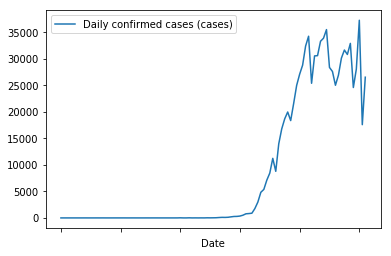

In [6]:
# Visualization (US daily cases)
df_daily_cases.plot(x='Date')

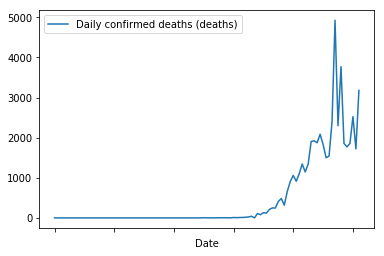

In [7]:
# Visualization (US daily deaths)
df_daily_deaths.plot(x='Date')

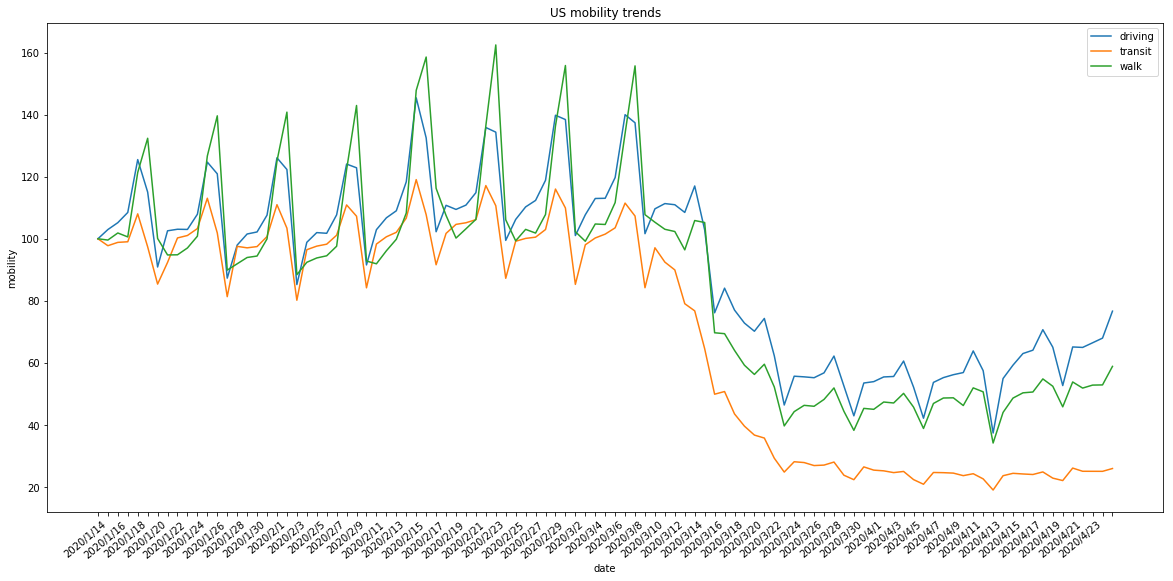

In [8]:
# Visualization (US mobility trends)
# df_mobUS
cols = df_mobUS.columns[1:]

drive = df_mobUS.values[0]
transit = df_mobUS.values[1]
walk = df_mobUS.values[2]

fig, ax = plt.subplots(figsize=(20, 10))
ax.set_xticks(np.arange(len(cols))) 
ax.set_xticklabels(cols)

plt.plot(cols, drive[1:], label="driving");
plt.plot(cols,transit[1:], label="transit");
plt.plot(cols,walk[1:], label="walk");

plt.xlabel('date')
plt.ylabel('mobility')
plt.title('US mobility trends')
plt.legend()

plt.gcf().autofmt_xdate()
plt.xticks(rotation=40) 
spacing = 2
for label in ax.xaxis.get_ticklabels()[::spacing]:
    label.set_visible(False)

plt.show()

In [9]:
# seperating data into types of city, type of transit

# each city's type of transit
driveList = []
transitList = []
walkList = []

# each city
allCities = []
cityList = []

ttype = 1
for row in df_mobUScty.values:
    # seperating vals by transit type, city name
    if ttype % 3 == 1:
        cityList.append(row)
        
        driveList.append(row)
        
        ttype += 1
    elif ttype % 3 == 2: 
        cityList.append(row)
        
        transitList.append(row)
        
        ttype += 1
    elif ttype % 3 == 0:
        cityList.append(row)
        allCities.append(cityList)
        cityList = []
        
        walkList.append(row)
        
        ttype = 1
    else:
        raise Exception("dataError")

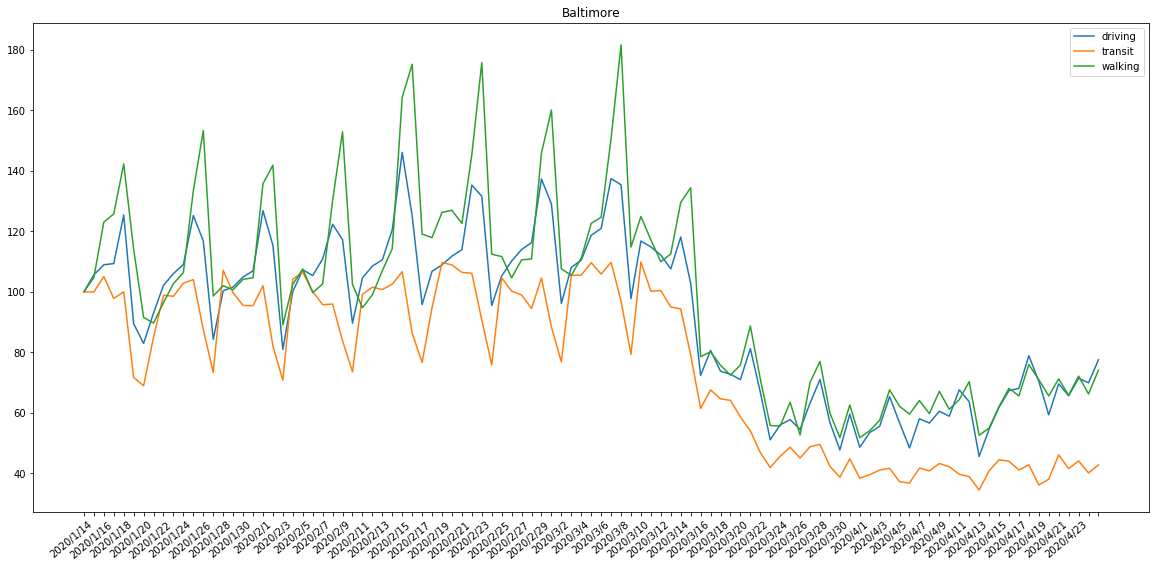

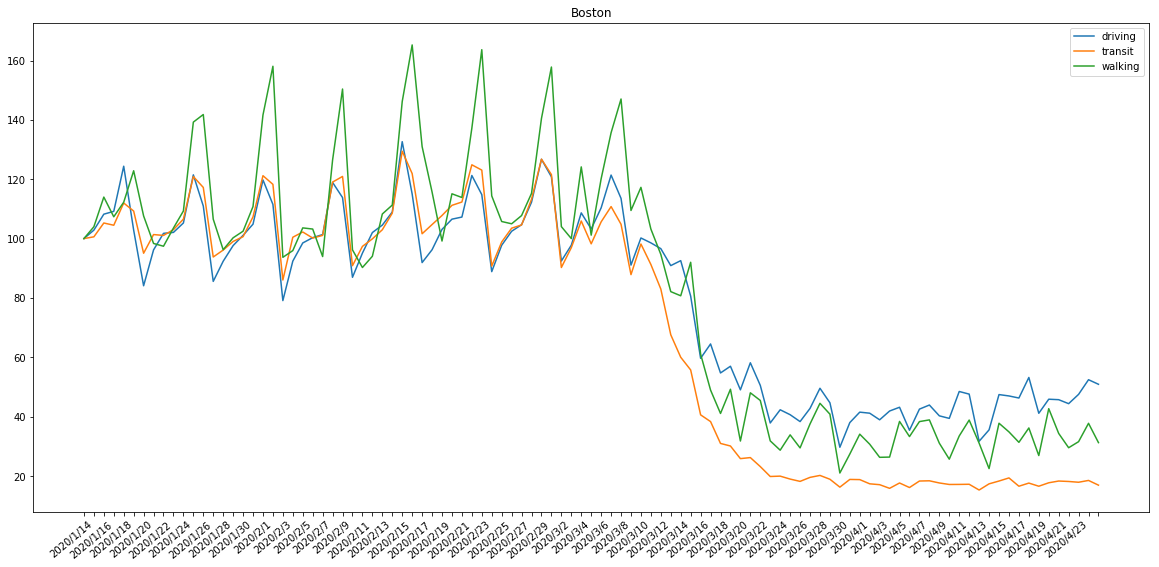

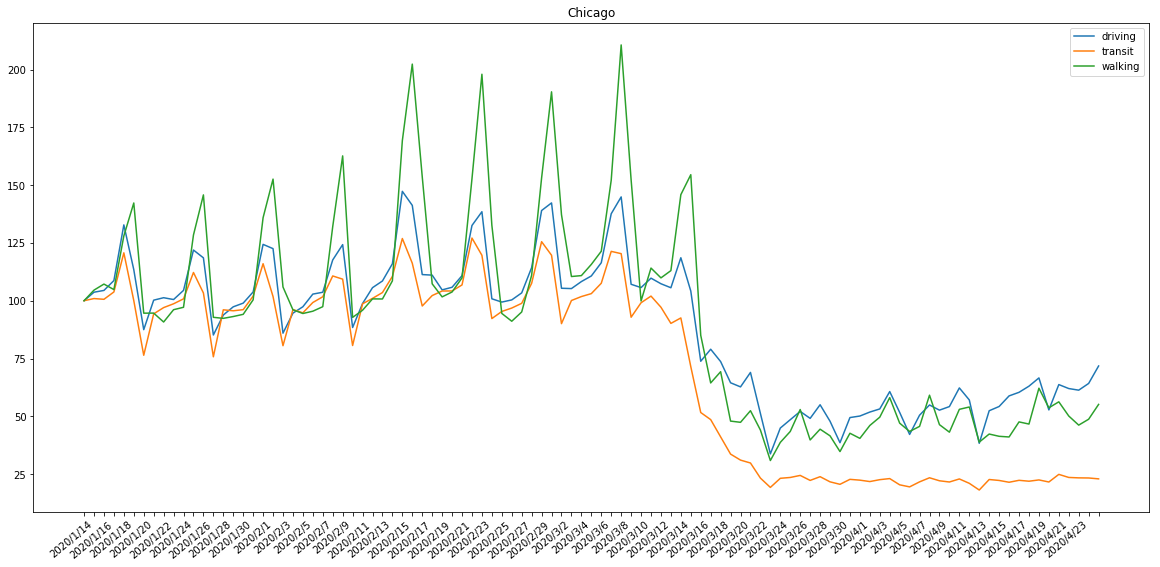

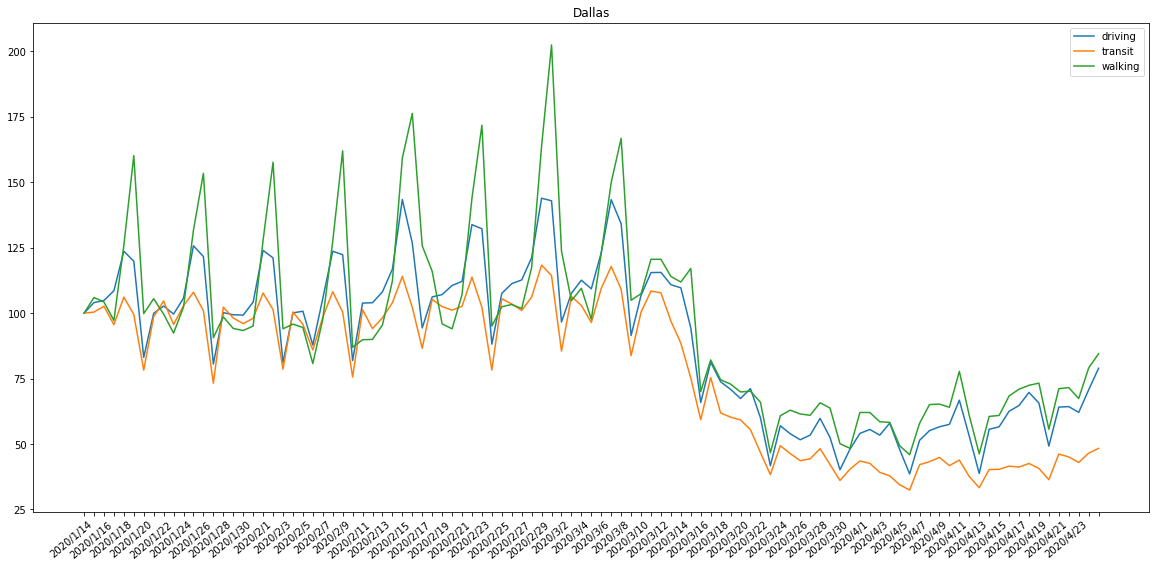

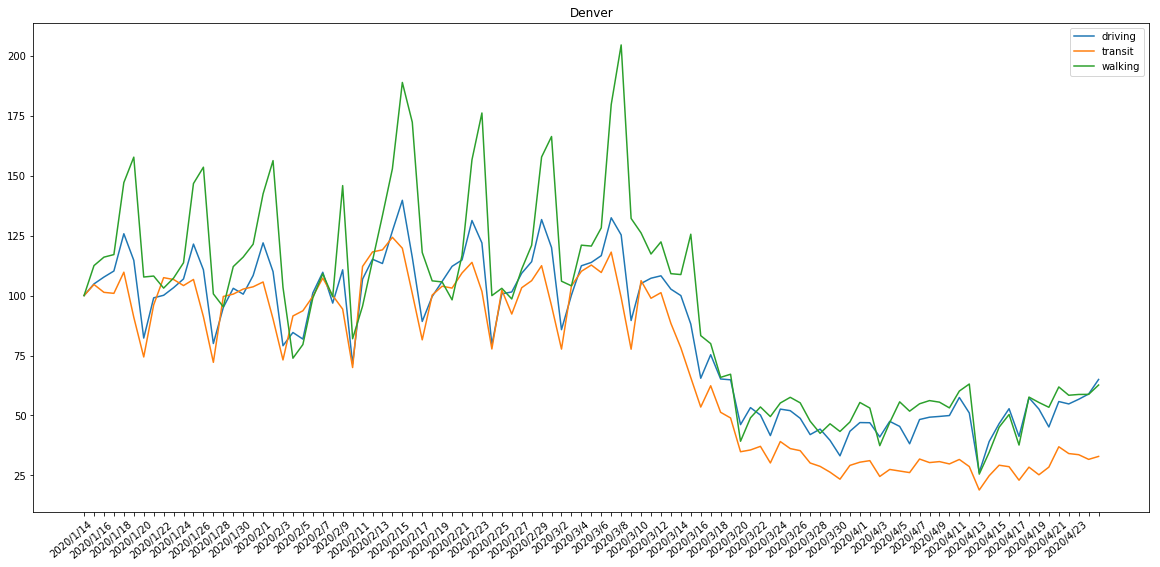

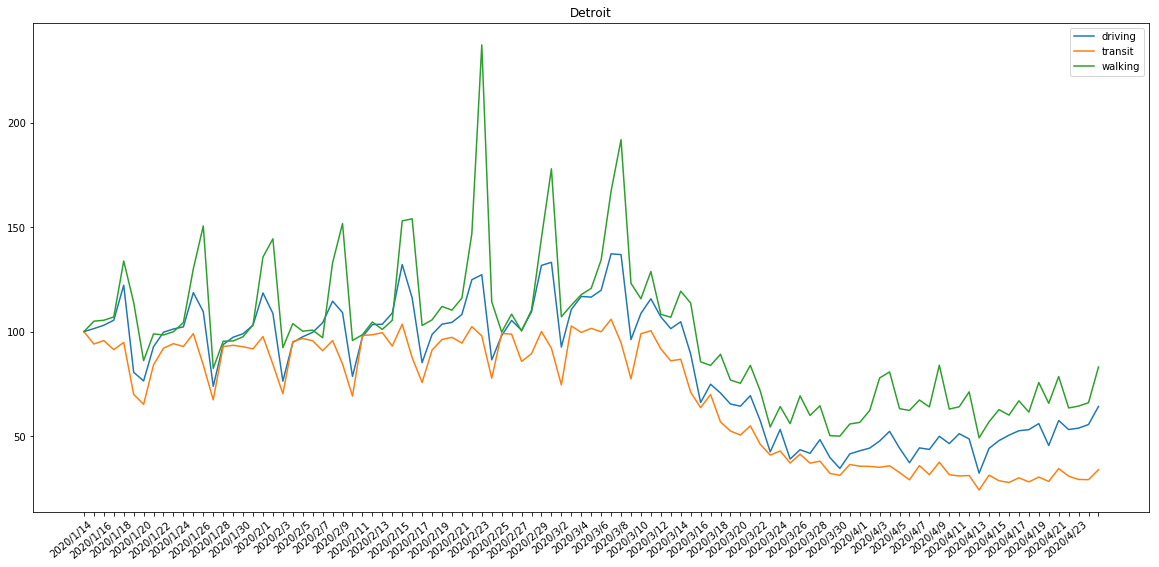

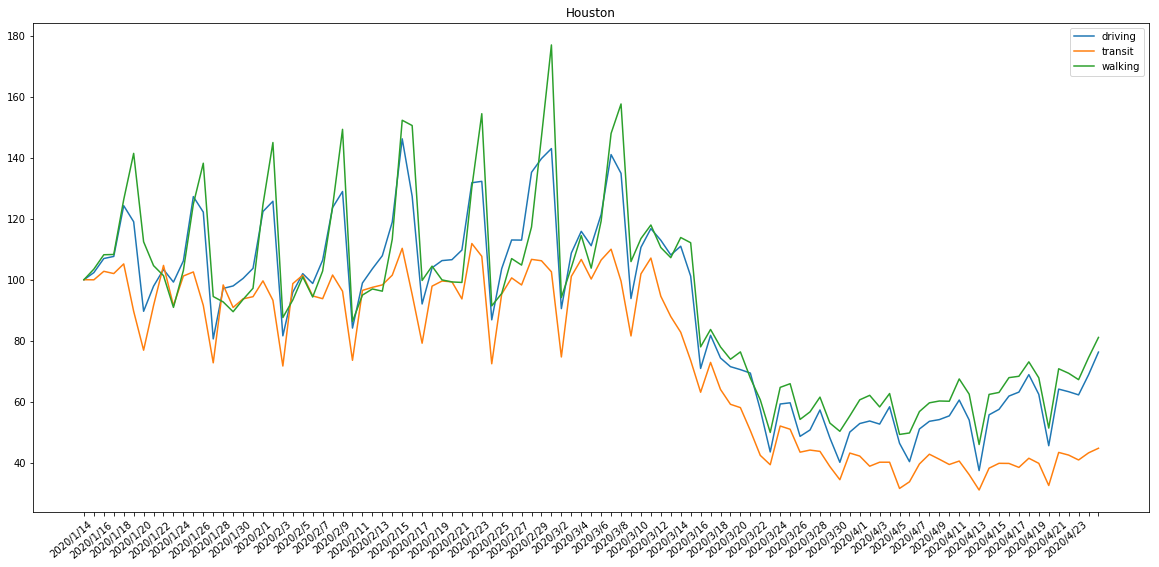

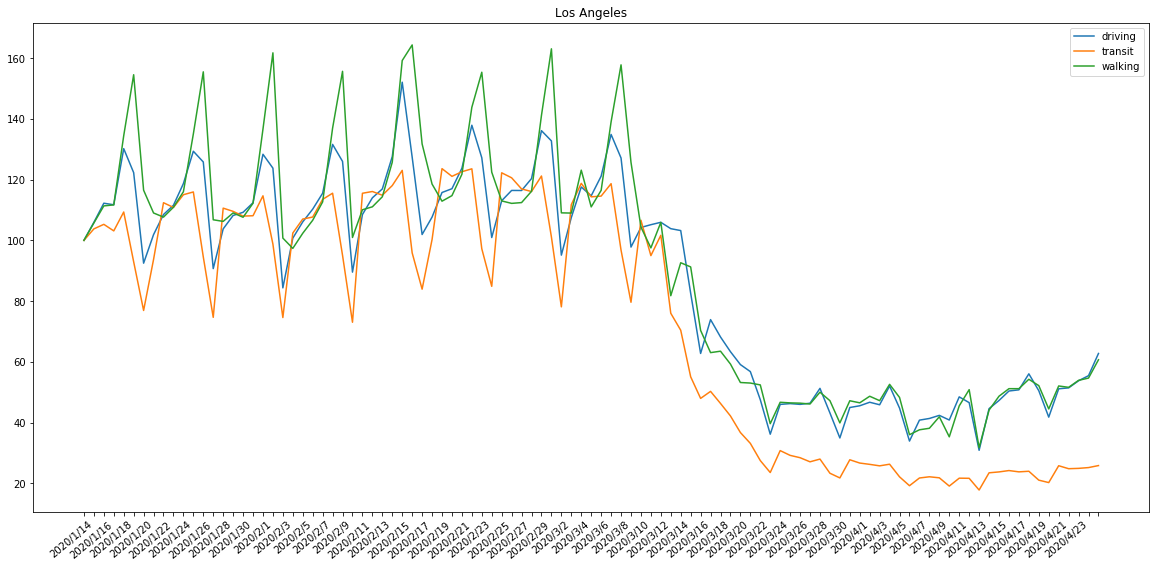

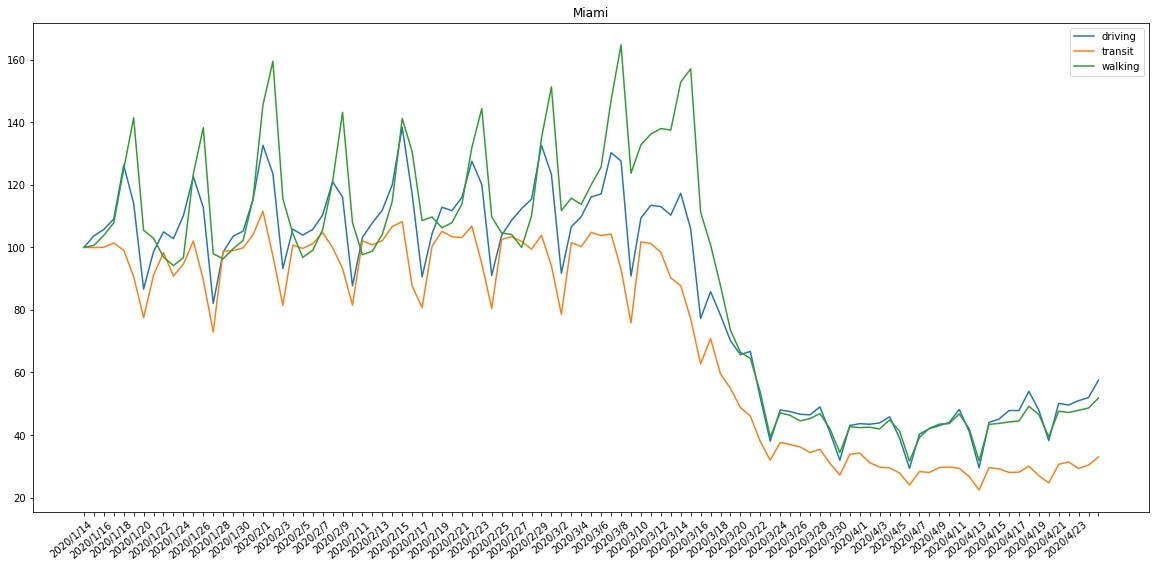

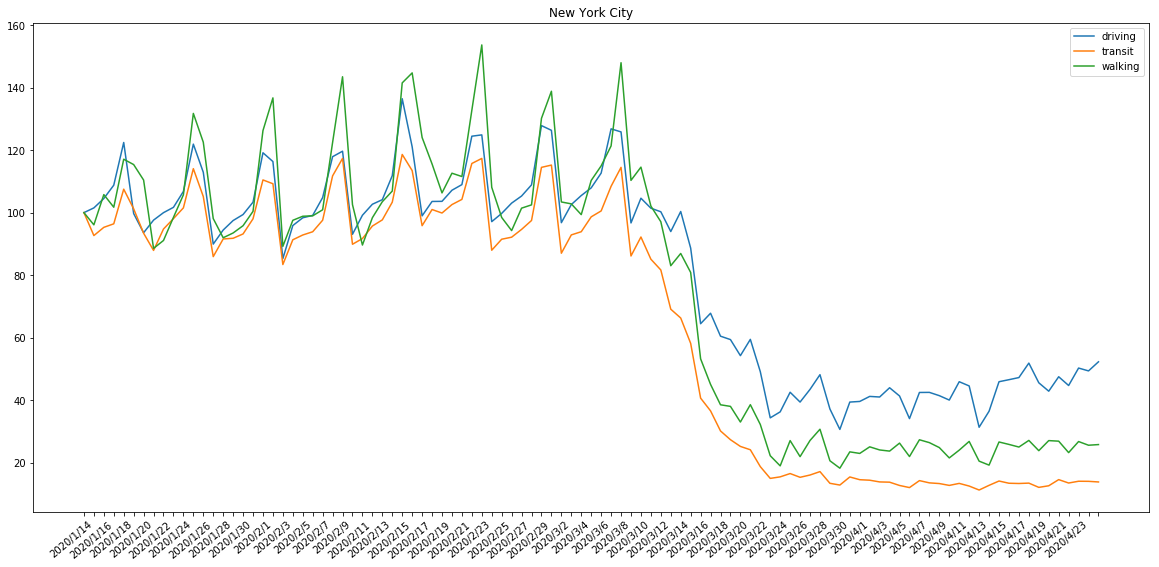

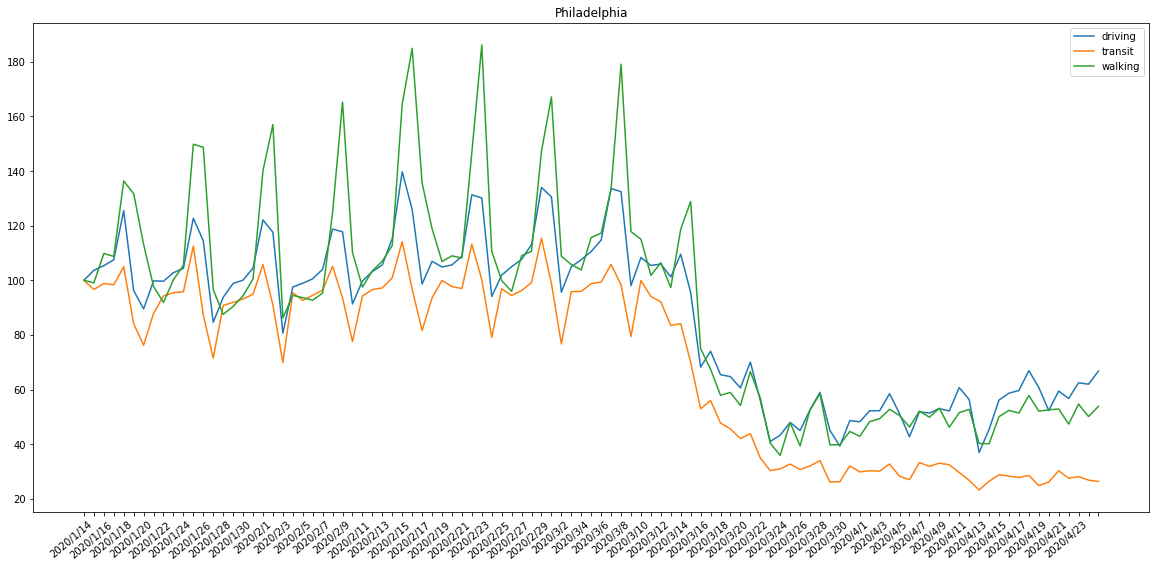

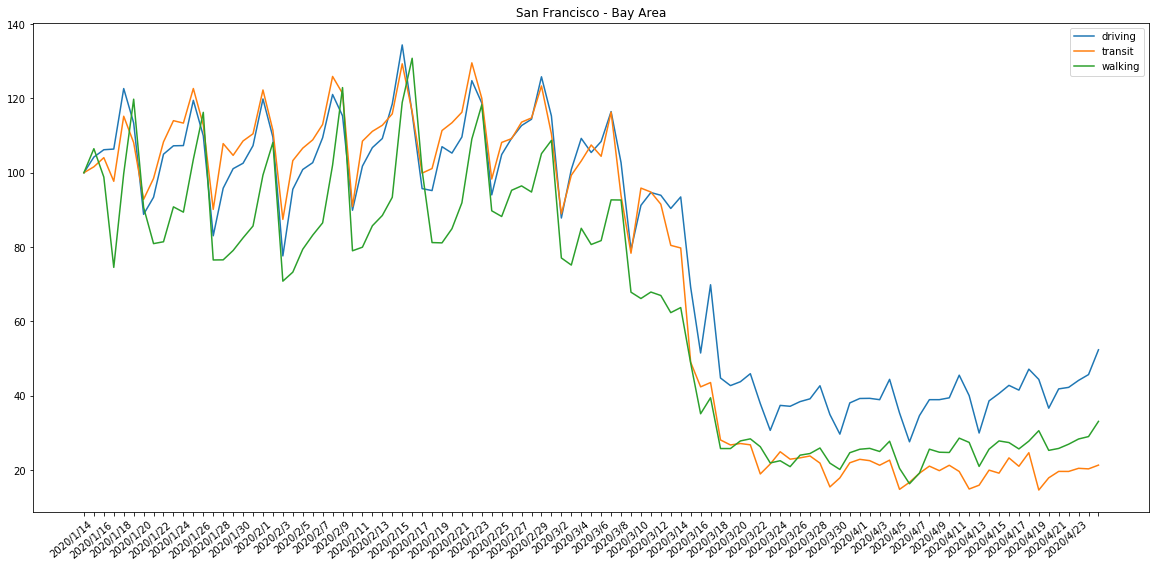

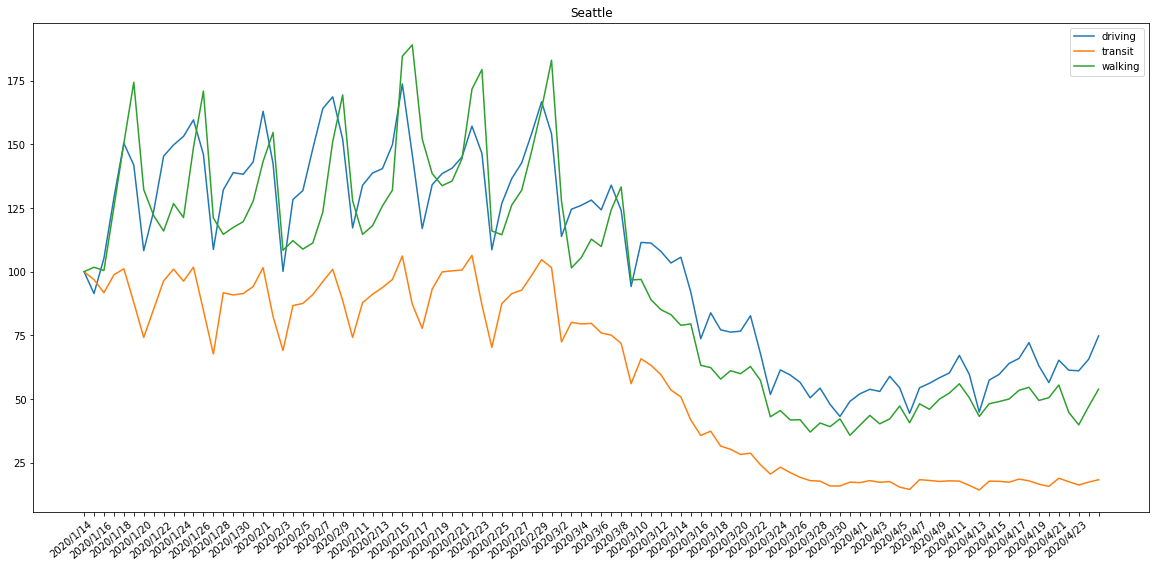

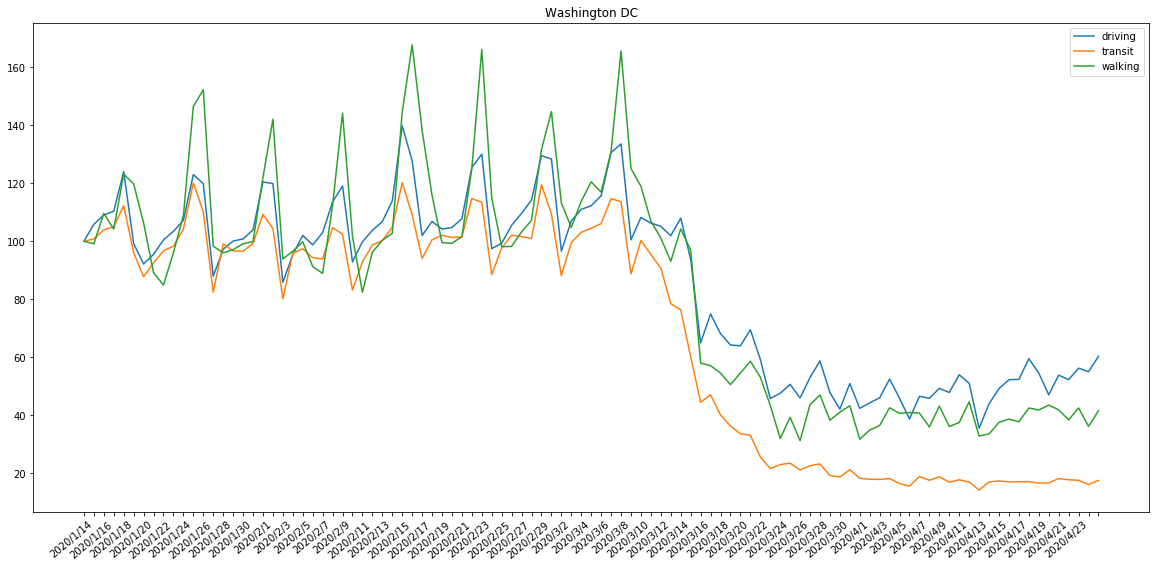

In [15]:
# Visualization (each city types of transit)
# df_mobUScty

dates = df_mobUScty.columns[2:]

for citygroup in allCities:
    cityName = ""
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.set_xticks(np.arange(len(dates))) 
    ax.set_xticklabels(cols)
    for city in citygroup:
        cityName = city[0]
        transtype = city[1]
        data = city[2:]
        
        plt.plot(dates, data, label=transtype)
        
    plt.title(cityName)
    plt.legend()
    
    plt.gcf().autofmt_xdate()
    plt.xticks(rotation=40)
    
    spacing = 2
    for label in ax.xaxis.get_ticklabels()[::spacing]:
        label.set_visible(False)
    
    plt.show()
        



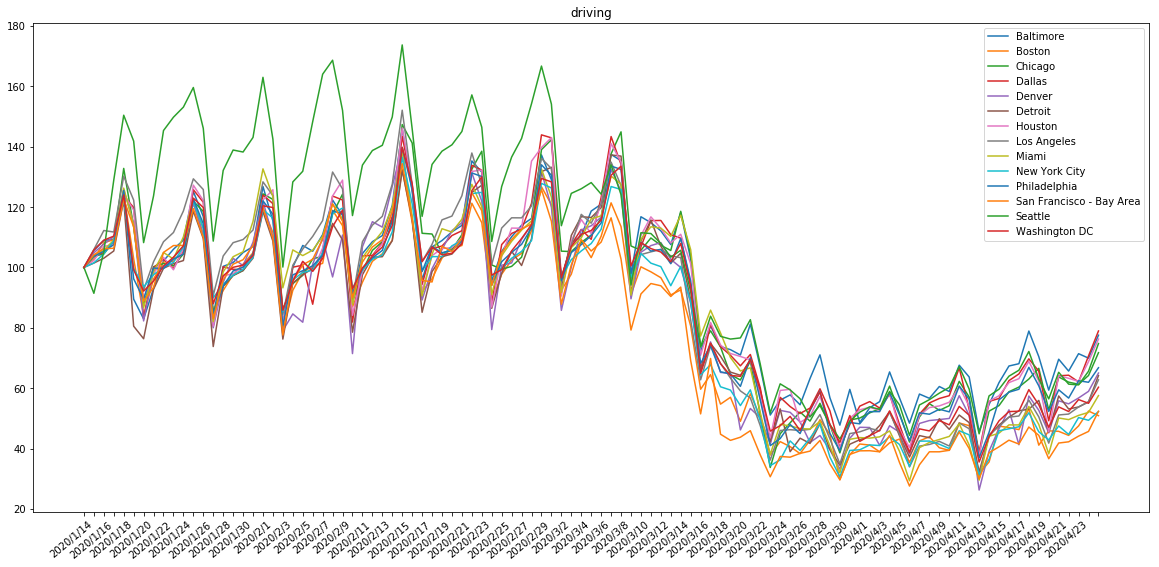

In [29]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_xticks(np.arange(len(dates))) 
ax.set_xticklabels(cols)
transtype = ""

for city in driveList:
    cityName = city[0]
    transtype = city[1]
    data = city[2:]
    
    plt.plot(dates, data, label=cityName)

    
plt.title(transtype)
plt.legend()

plt.gcf().autofmt_xdate()
plt.xticks(rotation=40)

spacing = 2
for label in ax.xaxis.get_ticklabels()[::spacing]:
    label.set_visible(False)
plt.show()
    

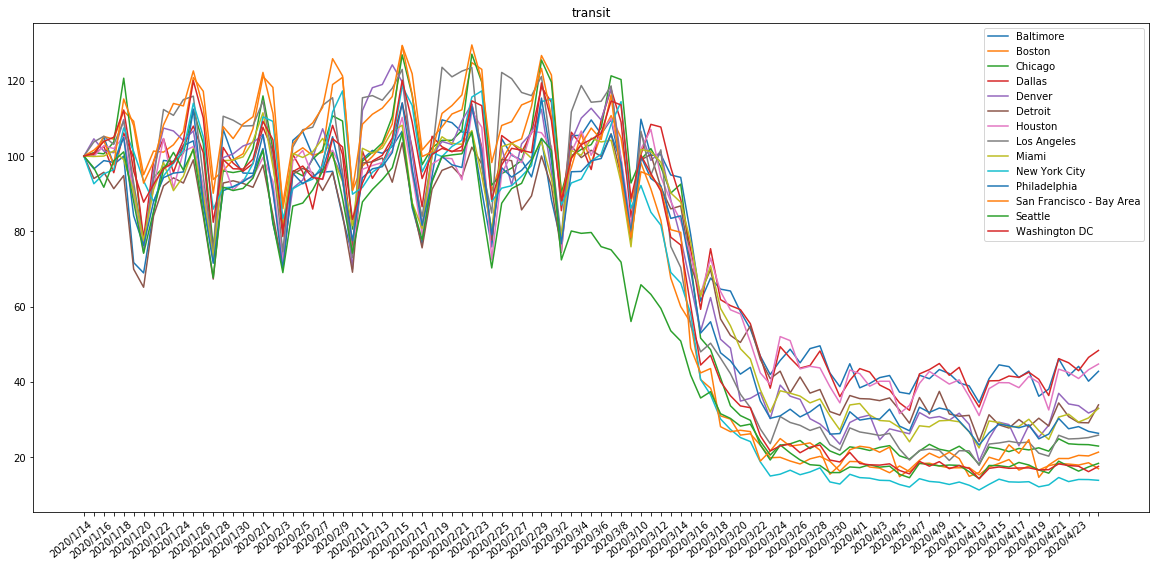

In [30]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_xticks(np.arange(len(dates))) 
ax.set_xticklabels(cols)
transtype = ""

for city in transitList:
    cityName = city[0]
    transtype = city[1]
    data = city[2:]
    
    plt.plot(dates, data, label=cityName)

    
plt.title(transtype)
plt.legend()

plt.gcf().autofmt_xdate()
plt.xticks(rotation=40)

spacing = 2
for label in ax.xaxis.get_ticklabels()[::spacing]:
    label.set_visible(False)
plt.show()
    

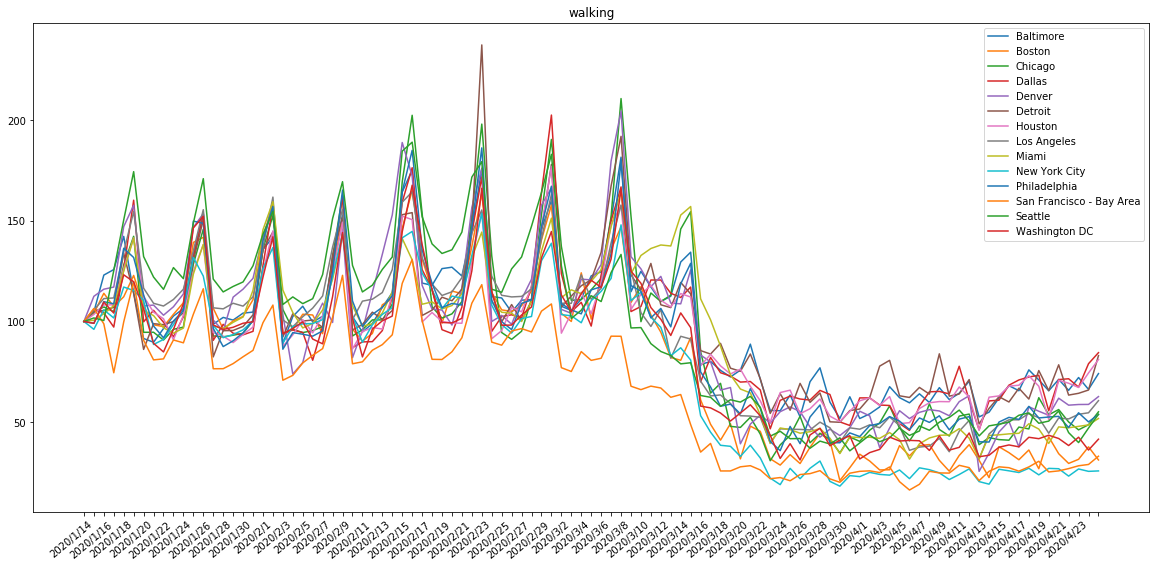

In [31]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_xticks(np.arange(len(dates))) 
ax.set_xticklabels(cols)
transtype = ""

for city in walkList:
    cityName = city[0]
    transtype = city[1]
    data = city[2:]
    
    plt.plot(dates, data, label=cityName)

    
plt.title(transtype)
plt.legend()

plt.gcf().autofmt_xdate()
plt.xticks(rotation=40)

spacing = 2
for label in ax.xaxis.get_ticklabels()[::spacing]:
    label.set_visible(False)
plt.show()
    